In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

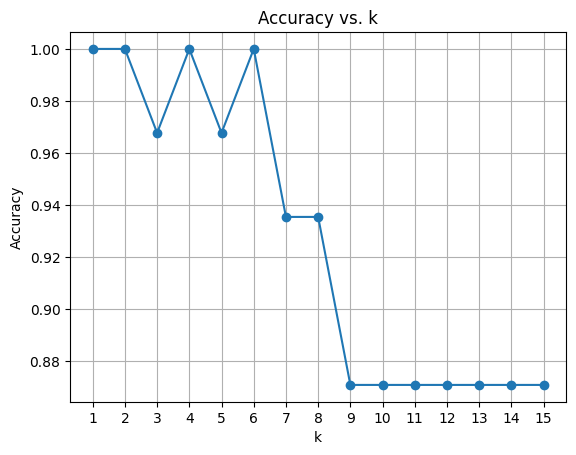

In [6]:
# Učitavanje podataka iz CSV fajla
iris_data = np.genfromtxt('iris.csv', delimiter=',', dtype=None, encoding=None)

# Izdvajanje feature-a i oznaka klasa
X = iris_data[1:, :-1].astype(float)  # Svi feature-i osim poslednjeg
y = iris_data[1:, -1]

# Mapiranje string labela u numeričke vrednosti
class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_numeric = np.array([class_map[label] if label in class_map else label for label in y])

# Definisanje trening i test skupa
X_train_part1 = X[:41]
X_train_part2 = X[51:91]
X_train_part3 = X[141:151]
X_train = np.concatenate([X_train_part1, X_train_part2, X_train_part3], axis=0)

X_test_part1 = X[41:52]
X_test_part2 = X[91:102]
X_test_part3 = X[141:152]
X_test = np.concatenate([X_test_part1, X_test_part2, X_test_part3], axis=0)

y_train_part1 = y_numeric[:41]
y_train_part2 = y_numeric[51:91]
y_train_part3 = y_numeric[141:151]
y_train = np.concatenate([y_train_part1, y_train_part2, y_train_part3], axis=0)

y_test_part1 = y_numeric[41:52]
y_test_part2 = y_numeric[91:102]
y_test_part3 = y_numeric[141:152]
y_test = np.concatenate([y_test_part1, y_test_part2, y_test_part3], axis=0)

class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        expanded_X_test = tf.expand_dims(X_test, axis=1)
        X_test = np.expand_dims(X_test, axis=0)
        expanded_X_test = tf.reshape(expanded_X_test, [-1, 1, X_test.shape[1]])
        squared_distances = tf.reduce_sum(tf.square(tf.subtract(self.X_train, expanded_X_test)), axis=2)
        distances = tf.sqrt(squared_distances)
        _, top_k_indices = tf.nn.top_k(-distances, k=self.k)
        top_k_labels = tf.gather(self.y_train, top_k_indices)
        unique_labels, _, counts = tf.unique_with_counts(tf.reshape(top_k_labels, [-1]))
        predicted_label = unique_labels[tf.argmax(counts)]
        return predicted_label

# List za cuvanje tacnosti za razlicite vrednosti k
accuracies = []

# Iteriranje kroz razlicite vrednosti k
for k in range(1, 16):
    # Kreiranje i treniranje modela
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    # Predvidjanje oznaka klasa za test skup
    predictions = []
    for sample in X_test:
        predicted_label = knn.predict(sample)
        predictions.append(predicted_label.numpy())

    # Racunanje tacnosti
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

# Prikazivanje krive tacnosti
plt.plot(range(1, 16), accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()